In [260]:
#script may throw some warning from Panda about writing to dataframes. This is because Pandas very cautiously warns you any
#time you ever write to a copy of a dataframe, even if you then store it somewhere, since many of its operations on slices
#are not "in-place" or may not act as they are expected to for experienced numpy users


import os
os.getcwd()

#script incorporates fix on our side for frettraj issue so frettraj doesnt need to be edited


import warnings
warnings.filterwarnings('ignore')

In [261]:
import yaml

# Specify the path to your YAML file
yaml_file_path = "/Users/aishkrishnamohan/FRETNet-Designer/config.yaml"

# Load the YAML file
with open(yaml_file_path, "r") as yaml_file:
    settings = yaml.safe_load(yaml_file)

# Now, the 'settings' variable contains the loaded YAML data


In [262]:
# """
# To implement:
# Move everything into pd DataFrames
#     May require multiple for data of different dimensions
#         1D: sequence-wise multi-column, 2D: pair-wise multi-column, larger 2D: pairs of pairs multi-column (could also be 4d multi column for compressed dimensions) 
# Add multi-chain support
# Move Parameters to external settings file
#     Step 1: move all settings to a dictionary or class
# Implement automatic performance of MSA for DCA
# Implement reloading of AV data
# Implement optional use of frettraj
# """

###########################
### 1. General settings ###
###########################

# settings={}
# settings['work_directory'] = \
#     r'/Users/aishkrishnamohan/FRETNet-Designer/Test/'      # The directory containing the data and structures of interest. Outputs of this code will be saved in subfolders.
# settings['output_directory']=settings['work_directory']+'outputs/'  # Subfolder to save output files in. Will be created if it doesn't exist
# settings['input_directory']=settings['work_directory']+'inputs/'    # name of a subfolder from a previous run from which things like AVs can be reloaded rather than re-calculated
# settings['dependancy_directory'] = \
#     r'/Users/aishkrishnamohan/FRETNet-Designer/Script_Dependancies' # Directory containing the Python implementation of DCA and other custom functions
# settings['input_structures'] = \
#     [ "/Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_closed_fromSBM+DCA.pdb", "/Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_open_fromSBM+DCA.pdb", "/Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_Twisted_allatom.pdb"] # Input structure files, must be list of strings which are names of files
# settings['fretraj_fix_our_side'] = True # Switch for whether we want to use logic which fixes the fretraj serial bug on our side or not. Previously we would hand-modify their package for a new install.
# settings['Randomization Seed']=10


# ###########################
# ### 1.1 Figure settings ###
# ###########################

# settings['figure_parameters']={'legend.fontsize': 'xx-large',
#          'figure.figsize': (10, 10),
#          'axes.labelsize': 'xx-large',
#          'axes.titlesize':'xx-large',
#          'xtick.labelsize':'xx-large',
#          'ytick.labelsize':'xx-large',
#          'lines.linewidth':1,
#          'font.family':'Arial',
#          'ps.fonttype':42,
#          'pdf.fonttype':42}

# #series of settings for whether or not to do a step, or whether to load a previous run or re-perform the action of a module\
# #these accept "False" (F), "True" (T), and "Load" (L) for ignoring, performing, or loading a previous run, respectively
# #Some parameters accept "Specify" (S), an option like load, but it lets you point to a specific folder/set of files/file to load that was pre-generated, rather than using 
# #all outputs from the folder specified in "input"
# settings['do_make_MSA']=True #T/F/L/S
# settings['do_DCA']=True #T/F/L/S
# settings['do_conservation_score']=True #T/F/L/S
# settings['Do_AV']=True#'Load' #True or 'Load' or 'Specify'

# ##########################################
# ### 2. Domain and Residue Restrictions ###
# ##########################################

# settings['define_domains'] = True                       # defines domains between which sites should be tested. This prevents sites from within the same domains 
#                                                         # being tested against one another. this essentially is a time saver, as sites within separate domains 
#                                                         # which are mutually re-orienting are likely to provide higher contrast than sites within a single domain
# settings['domain_bounds'] = \
#         [['Dom1',1,103], ['Dom2',104,271]]               # domain bounds accepts a list of lists containing the domain names, start residue, and end residue (in terms 
#                                                          # of the input file indexing). 
#                                                          # ['Dom3', 235, 271]] #takes name of domain plus the residue limits in terms of indices loaded by mdtraj
# settings['exclude_residues'] = False                     # exluded residues allows particular residues to be excluded. This will remove the residue from any relevant lists if present,
#                                                          # but will not perturb the domain definitions,
#                                                          # ranges of residues can be specified to be excluded as a list of [start, stop] inclusive. these will be popped out and 
#                                                          # generate individual entries into the exclusion list, so this is only for convenience. These are ignorby some analyses, 
#                                                          # and those analyses will be performed across the whole sequence. excluded really just marks these sitesed "bad" as if 
#                                                          # some parameter eliminated them, such as low SASA.
#                                                          # domain bounds really works at the pair level.
# settings['excluded_residues'] = [61,151,[152,155], 246]  # in this example, first two entries are redundant with domain bounds, 3rd eliminates a site in domain 2. Currently must feed this a list (even if empty)
# if settings['exclude_residues']:
#     for i in settings['excluded_residues']:
#         if type(i)==int:
#             continue
#         if type(i)==list:
#             settings['excluded_residues'].remove(i)
#             settings['excluded_residues'].extend(list(range(i[0],i[1]+1)))
#         else:
#             raise Exception('Invalid index encountered in exclusion list.')
#     settings['excluded_residues'].sort()

# ############################  
# ### 3. MSA file settings ###
# ############################

# settings['generate_MSA']=True   # Whether to generate an MSA during run-time or the user will provide a pre-generated MSA file. 
#                                 # Must ensure correct formating for DCA. Too many MSA formats to account for all of them. 
#                                 # Sequences should be padded to align exactly along the input structure sequence using '-' placeholder character.
#                                 # Each sequence should appear on a single line, with lines separated by >header lines.

# settings['pregenerated_MSA_file'] = \
#         settings['input_directory']+'OutMSA_filtered30.msa'    #location of pregenerated MSA file if generate_MSA == False

# ###################################################
# ### 3.1 settings for MSA generation at run-time ###
# ###################################################

# settings['input_seed'] = \
#     "Input_Structure_FASTA.fasta"                                       # location of input seed sequence file
# settings['max_align_gaps'] = "30"                                               # max number allowed gaps in sequences to allow for in filtering
# settings['outputHMM'] = 'OutHMM.hmm'                                          # ouput HMM file to generate.
# settings['database_path'] = \
#     '/Users/aishkrishnamohan/Pfam-A.fasta.gz'                     # database location
# settings['outputMSA_filename'] = 'OutMSA.msa'                                 # creates full sequence file with this name as well as filtered with this name +'_filtered<gapnumber>'
# settings['hmmer_bin'] = '/Users/aishkrishnamohan/hmmer/src/'       # location of hmmer bin for accessing hmmer CLI tools
# settings['easel_miniapps'] = \
#         '/Users/aishkrishnamohan/hmmer/easel/miniapps/'        # location of easel miniapps for access to easel CLI tools
# settings['filter_pfam_path'] = \
#         '/Users/aishkrishnamohan/FRETNet-Designer/filter_pfam_args.py' #filter pfam script path

# #######################
# ### 4. DCA settings ###
# #######################

# settings['pregenerated_DCA']=True                                            # whether DCA was pre-run. if true, need to specify a DCA output file
# settings['pregenerated_DCA_file']=settings['output_directory']+'outDCA.dat'
# settings['DCA_output']=settings['output_directory']+'outDCA.dat'

# ###############################
# ### 5. SASA and AV Settings ###
# ###############################

# settings['contact_cutoff']=.5 #nm. cutoff to convert residue to "bad" residue based on inter-residue contacts. 
# settings['SASA_cutoff']=0.2 #nm^2 cutoff below which the low SASA of the residue disqualifies if from labeling
# settings['contact_cutoff_mode']='average' #average or individual. Decides whether to check against the average contact or all individually (if all individually, any 1 below threshold discards the residue)
# settings['SASA_cutoff_mode']='average' #as above for contacts

# settings['generate_dye_parameters_file']=True #True/Load/Specify (need dye parameters for AV sims)
# settings['specified_dye_parameters_file']=None

# settings['Save_AVs_pkl']=True #Only used if Do_AV=True, saves AVs into a directory as appropriate for reloading
# settings['Save_AVs_xyz']=True #only used if Do_AV=True, saves AV xyz files for visualization
# settings['AV_label_atom']='CA' #must be an atom all residues have. can add exceptions later
# settings['Considered_Atoms']='Local_Labeled_Only' #which atoms to account for in AV simulations. An advanced feature to prevent side chains over-influencing AVs
#                                             #can be 'all' - , 
#                                             #'Global_Labeled_Only' to only account for the labeled atoms, temporarily deleting all others (similar to Go, 1-bead model)
#                                             #'Local_Labeled_Only', temporarily deleting atoms of labeled residue (except labeled atom) and neighboring +/-X residues
#                                             #'Backbone_Only', temporarily deletes all non-backbone atoms
# settings['Residues_Range_to_Ignore']=1
# #below settings are applied as needed to residue positions
# settings['basic_dye_parameters']={"Position":
#     {"Al488C5": 
#         {"linker_length": 20.5,
#             "linker_width": 2.5,
#             "dye_radius1": 5.0,
#             "dye_radius2": 4.5,
#             "dye_radius3": 1.5}, #"attach_id": int, attach id left blank as all pairs will have AVs computed, so this will be generated later
#     "Al647C2": 
#         {"linker_length": 21.0,
#             "linker_width": 2.5,
#             "dye_radius1": 7.15,
#             "dye_radius2": 4.5,
#             "dye_radius3": 1.5}, #"attach_id": int, attach id left blank as all pairs will have AVs computed, so this will be generated later
#     },
#     "Distance": {"Al488C5-Al647C2": 
#         {"R0": 52.,
#         "n_dist":10000}
#     }
# }

# settings['N_AV_points_mode'] = 'all' #all, average, or none
# settings['N_AV_points_threshold'] = 200


# if settings['Save_AVs_pkl']==True or settings['Save_AVs_xyz']==True:
#     avfoldername='AVs_{0}'.format(settings['Considered_Atoms'])
#     if settings['Considered_Atoms']=='Local_Labeled_Only':
#         avfoldername=avfoldername+'_'+str(settings['Residues_Range_to_Ignore'])+'_residue_window'
#     try:
#         os.mkdir(settings['output_directory']+avfoldername)
#     except FileExistsError:
#         print('AVs Directory exists')
#     except:
#         print('Something went wrong.')

In [263]:
if settings['exclude_residues']:
    for i in settings['excluded_residues']:
        if type(i)==int:
            continue
        if type(i)==list:
            settings['excluded_residues'].remove(i)
            settings['excluded_residues'].extend(list(range(i[0],i[1]+1)))
        else:
            raise Exception('Invalid index encountered in exclusion list.')
    settings['excluded_residues'].sort()

In [264]:
if settings['Save_AVs_pkl']==True or settings['Save_AVs_xyz']==True:
    avfoldername='AVs_{0}'.format(settings['Considered_Atoms'])
    if settings['Considered_Atoms']=='Local_Labeled_Only':
        avfoldername=avfoldername+'_'+str(settings['Residues_Range_to_Ignore'])+'_residue_window'
    try:
        os.mkdir(settings['output_directory']+avfoldername)
    except FileExistsError:
        print('AVs Directory exists')
    except:
        print('Something went wrong.')

AVs Directory exists


In [265]:
#%% Import statements

#import subprocess       #used for running bash within Python
import numpy as np      #used for various math functions as well as arrays
import math as m        #math functions
import pandas as pd     #structure output files into useful formats
import matplotlib.pyplot as plt #used for output plots
from matplotlib.colors import LogNorm #useful normalization for many plots' colorscaling
import matplotlib.colors as mcolor
from itertools import combinations #used for generating pairwise combinations of objects, especially residues
#import multiprocessing as mup #for future implementation of parallelization
import json             #used for handling options files for AV sims. Will likely convert these to pandas objects

import mdtraj as md     #used for loading and working with structure files. Alternative packages, with some reworking, would include Bio.PDB
#import avtraj as av     #used for generating accessible volume simulations of fluorophores. However, gives warnings with numba
import fretraj as ft    #alternative used for generating accessible volume simulations of fluorophores. Can also simulate photon traces
import copy
import warnings
import random
random.seed(settings['Randomization Seed'])

from Script_Dependancies import GenerateMSA as msa


os.chdir(settings['dependancy_directory']) #folder containing the scripts needed for this to run
import DCA              #used for direct coupling analysis (DCA), a co-evolution approach to parsing out mutual information between residues that hints at interactions
import ConservationScore #used for single residue conservation score analysis with simple shannon entropy. can add other function options as well



In [266]:

print("fretraj: "+ ft.__version__)
print("mdtraj: "+ ft.__version__)
print("numpy: " + np.__version__)
import numba as nb
print("numba: " + nb.__version__)
import matplotlib as mpl
print("matplotlib: " + mpl.__version__)
import sys
print("python: " + sys.version)
print("pandas: " + pd.__version__)
# print("mdtraj: " + md.__version__)
print("json: " + json.__version__)

fretraj: 0.2.10
mdtraj: 0.2.10
numpy: 1.24.4
numba: 0.58.1
matplotlib: 3.7.4
python: 3.8.0 (default, Nov  6 2019, 15:49:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas: 2.0.3
json: 2.0.9


In [267]:
def gaussian(x,u,s,mode='normal'):
    if mode=='normal':
        return np.exp(-.5*((x-u)/s)**2.)*(2*s**2.*np.pi)**(-.5)
    if mode=='peakto1':
        return np.exp(-.5*((x-u)/s)**2.)

In [230]:
"""Add multi-chain support"""


'Add multi-chain support'

In [240]:
#adjust figure output parameters for figures made in matplotlib
import matplotlib.pylab as pylab 
pylab.rcParams.update(settings['figure_parameters'])

In [241]:
#change to or add input directory
try:
    os.chdir(settings['input_directory'])
except FileNotFoundError:
    os.mkdir(settings['input_directory'])
    os.chdir(settings['input_directory'])

In [242]:
#Pandas DataFrame will contain all single-residue information for each lookup
single_residue_info=pd.DataFrame()
#load the input structures
md_struct=md.load(settings['input_structures'])

In [243]:
#set up initial single-residue information


#grab residue list from structure. Maintains residue object types
single_residue_info['Residue List']=md_struct.topology._residues
#residue indices
single_residue_info['Residue Index']=[x.resSeq for x in single_residue_info['Residue List']]
#Residue 1 letter codes
single_residue_info['One Letter Code']=[x for x in md_struct.topology.to_fasta()[0]]
#Residue label atom Serial ID
single_residue_info['{0} Serial ID'.format(settings['AV_label_atom'])]=[md_struct[0].top._atoms[i].serial for i in md_struct[0].top.select("name {0}".format(settings['AV_label_atom']))]
#Residue non-serial id (index); a unique identified that doesn't change as atoms are deleted
single_residue_info['{0} Index ID'.format(settings['AV_label_atom'])]=[md_struct[0].top._atoms[i].index for i in md_struct[0].top.select("name {0}".format(settings['AV_label_atom']))]
#list of residues "good"=True or "bad"=False. Residues converted to bad when some undesirable quality is found at the single residue level
single_residue_info['Good List']=[True for res in range(len(single_residue_info['Residue List']))]
print('#Good={0}'.format(sum(single_residue_info['Good List'])))
#remove residues we specified for removal
if settings['exclude_residues']:
    single_residue_info.loc[[x in settings['excluded_residues'] for x in single_residue_info['Residue Index']],'Good List']=False
    print('#Good={0}'.format(sum(single_residue_info['Good List'])))
if settings['define_domains']:
    for i in range(len(single_residue_info)):
        if not any([single_residue_info['Residue Index'][i] in x for x in [list(range(y[1],y[2]+1)) for y in settings['domain_bounds']]]):
            single_residue_info['Good List'][i]=False
    print('#Good={0}'.format(sum(single_residue_info['Good List'])))
#define the index of the first residue as a reference for those outputs that index at 0 or 1
first_residue=int(str(list(md_struct.topology.residues)[0])[3:])

#Good=271
#Good=271


In [183]:
#create initial dataframe containing residue pair-pair information

#Pandas DataFrame will contain all pair-wise residue information for each pair. 
#length Nx(N-1)/2 (no need to compute self-pair parameters/diagonal of matrix nor degenrate pairs (ie 1-5, 5-1)). 
#Data per column is 1D, should be squareformed for plotting
pair_residue_info=pd.DataFrame()
pair_residue_info['Residue Pair']=list(combinations(single_residue_info['Residue Index'],2)) #given as tuples with indexing as in single_residue_info (original indexing)
pair_residue_info['Good List']=[True for i in range(len(pair_residue_info))]
#make sure pairs span domains. so first, create list of all valid pairs
explicitdomains=[list(range(y[1], y[2]+1)) for y in settings['domain_bounds']]
for j in range(len(explicitdomains)):
    for i in settings['excluded_residues']:
        if i in explicitdomains[j]:
            explicitdomains[j].remove(i)
if settings['define_domains']:        
    domaincombos=combinations(list(range(len(settings['domain_bounds']))),2)
    valid_pairs=[]
    for i in domaincombos:
        valid_pairs.extend([(x,y) for x in explicitdomains[i[0]] for y in explicitdomains[i[1]]])
    for i in range(len(pair_residue_info)):
        if pair_residue_info['Residue Pair'][i] not in valid_pairs:
            pair_residue_info['Good List'][i]=False
print('#Good pairs={0}'.format(sum(pair_residue_info['Good List'])))

#Good pairs=16932


In [184]:
#directory for outputs

try:
    os.chdir(settings['output_directory'])
except FileNotFoundError:
    os.mkdir(settings['output_directory'])
    os.chdir(settings['output_directory'])

In [185]:
#generate a text fasta file for input to external MSA script (header is also added to the file)
with open('Input_Structure_FASTA.fasta','w+') as f:
    f.write('>Input_Structure\n'+md_struct.topology.to_fasta()[0]+'\n')
    f.close()
    


In [186]:
#auto generate MSA alignment file when requested
os.chdir('/Users/aishkrishnamohan/FRETNet-Designer/')

if  settings['generate_MSA'] == True:
    msa.generate_msa(settings)

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.4 (Aug 2023); http://hmmer.org/
# Copyright (C) 2023 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             Input_Structure_FASTA.fasta
# output HMM file:                  OutHMM.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     Input_Structure_FASTA     1   271   271     0.41  0.587 

# CPU time: 0.08u 0.00s 00:00:00.08 Elapsed: 00:00:00.08


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



4444444...457899999999875543320222231343445667899**************9765.5789********* PP

    Input_Structure_FASTA 206 ksdvmvvgfdgtpdgekavndgklaati 233
                              +s    +g d   d    +  g+l a +
  A0A3N0BYS7_9MICC/63-313 207 RSLDAFIGHDLNSDNVALLRSGRLNAVL 234
                              **9999*******999999999999876 PP

>> R5KBQ2_9CLOT/127-285  R5KBQ2.1 PF13377.8;Peripla_BP_3;
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 ?   16.7   0.0    0.0074       8.6     170     256 ..      58     144 ..      20     154 .. 0.75

  Alignments for each domain:
  == domain 1  score: 16.7 bits;  conditional E-value: 0.0074
  Input_Structure_FASTA 170 lnvmqnlltahpdvqavfaqndemalgalralqtagk...sdvmvvgfdgtpdgekavndgklaatiaqlpdqigakgvetadkvlkg 254
                              v+++ll ++p+++a+++ nd m+  a + l++ g     d+ ++gfd +p     ++ 

In [187]:
#while its called inDCA, this is the MSA file used for both DCA and single residue conservation
#pregenerated should be made via Aish's get_alignments.bash until Frank's implementation is here

if settings['generate_MSA'] == True:
    inDCA=settings['outputMSA_filename']+'_filtered{0}'.format(settings['max_align_gaps'])
else:
    inDCA=settings['pregenerated_MSA_file']
    
    

In [190]:
#perform DCA using the generated multi sequence alignment
#counterbalance to single residue conservation, as indicates variability in residue position may be dependent on another co-substitution
if not settings['pregenerated_DCA']:    
    outDCA=settings['DCA_output']
    DCA.dca(inDCA,outDCA, theta=0.1)
else:
    outDCA=settings['pregenerated_DCA_file']
DCAresult=np.loadtxt(outDCA)
pair_residue_info['DCA Mutual Info']=DCAresult[:,2]
pair_residue_info['DCA Direct Info']=DCAresult[:,3]
del(DCAresult)

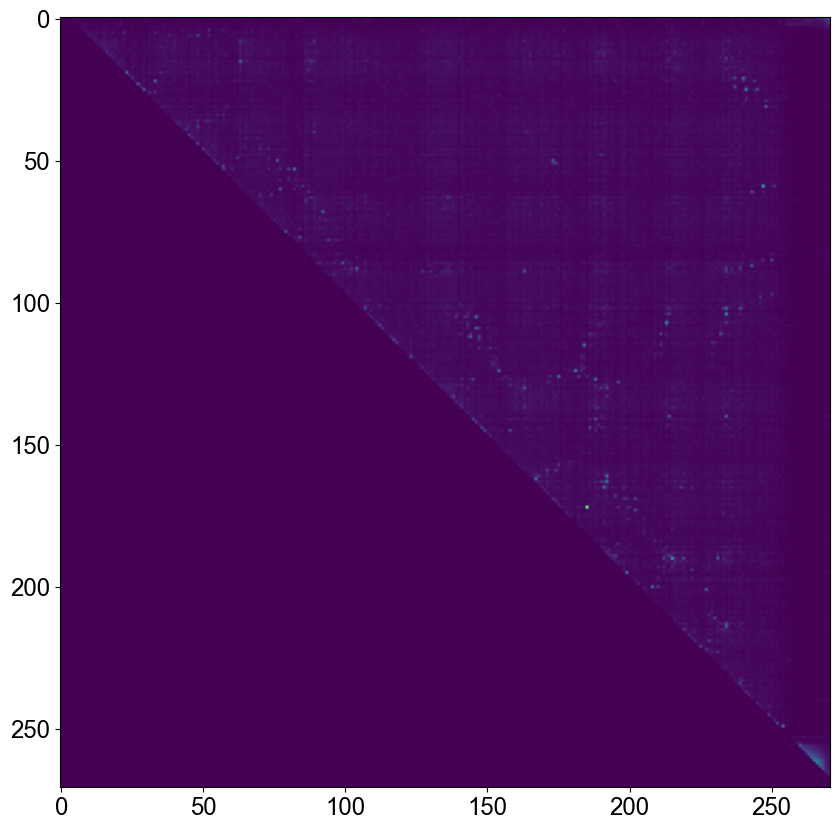

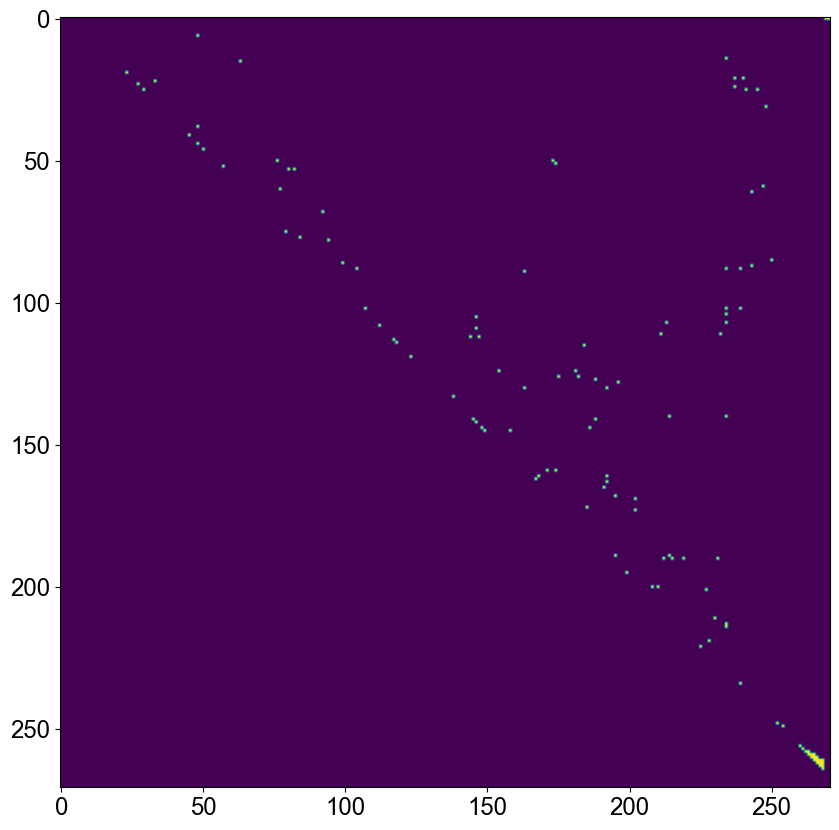

In [191]:
#visualize DCA. Threshold here not applied in analysis, ony visualization. For analysis, DI values are instead ranked

to_im=np.zeros((len(single_residue_info),len(single_residue_info)))
to_im_thresh=np.zeros((len(single_residue_info),len(single_residue_info)))
vis_thresh=0.05
min_dist=3
for i in range(len(pair_residue_info)):
    if abs(pair_residue_info['Residue Pair'][i][0]-pair_residue_info['Residue Pair'][i][1])>min_dist:
        to_im[pair_residue_info['Residue Pair'][i][0]-1,pair_residue_info['Residue Pair'][i][1]-1]=pair_residue_info['DCA Direct Info'][i]
        if pair_residue_info['DCA Direct Info'][i]>vis_thresh:
            to_im_thresh[pair_residue_info['Residue Pair'][i][0]-1,pair_residue_info['Residue Pair'][i][1]-1]=1
plt.imshow(to_im, vmin=pair_residue_info['DCA Direct Info'].min())
plt.show()
plt.imshow(to_im_thresh)
plt.show()

In [192]:
#single residue conservation scoring
#uses simple Shannon entropy metric for the information associated with each residue position
#high information content makes labeling favorable, as the position naturally experiences heterogeneity, so substitutions are favorable
#output file name
settings['output_conservation_score_file']='OutConScore.dat'
#alphabet of supported characters/residues for conservation score analysis. for now, is just native protein AAs+placeholder characters
settings['conservation_alphabet']=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','-']

#converts the sequence-wise array to a column-wise list to fead to conservation scorer
columnwise=[col for col in np.array([[res for res in seq] for seq in np.loadtxt(inDCA,dtype='str',usecols=0)[1::2]]).T]

#function takes a single string of characters and computes shannon entropy, so have to feed it columns from MSA.
#computes entropy weighted by the equally-weighted probability of all alphabet entries (1./22. for 22 entries)
ConScores=[ConservationScore.ConservationScore(col,settings['conservation_alphabet'],weight=1.,logbase=m.e) for col in columnwise]
single_residue_info['Conservation Scores']=ConScores

In [193]:
#calculate inter-residue contacts (distances). Used to threshold sites to remove those that make contacts with each other
contacts,contactsindices=md.compute_contacts(md_struct)
maxadder=np.ones((len(contacts),1))*np.max(contacts)
contacts=np.concatenate((maxadder,maxadder,contacts),axis=1)
contactsindices=np.concatenate((np.array([[0,1],[0,2]]),contactsindices))
for i in range(len(pair_residue_info)-4):
    if contactsindices[i][0]<contactsindices[i+1][0] and contactsindices[i][0]<len(single_residue_info)-1:
        contacts=np.concatenate((contacts[:,i+1:],maxadder,maxadder,contacts[:,:i+1]),axis=1)
        contactsindices=np.vstack((contactsindices[:i+1], np.array([[contactsindices[i][0]+1,contactsindices[i][0]+2],[contactsindices[i][0]+1,contactsindices[i][0]+3]]),contactsindices[i+1:]))
contacts=np.concatenate((contacts,maxadder,maxadder,maxadder),axis=1)
contactsindices=np.vstack((contactsindices, np.array([[contactsindices[-1][0]+1,contactsindices[-1][1]-1],[contactsindices[-1][0]+1,contactsindices[-1][1]],[contactsindices[-1][0]+2,contactsindices[-1][1]]])))

la=0
for i in settings['input_structures']:
    pair_residue_info['Contacts '+i+' (nm)']=contacts[la]
    la+=1
del(la)
pair_residue_info['Contacts']=[i for i in contacts.T]
pair_residue_info['Mean Contacts']=np.mean(contacts,axis=0)

In [194]:
#compute solvent-accessible surface area for all residues in all frames
#is a measure of accessibility for labeling
SASA=md.shrake_rupley(md_struct,mode='residue')
la=0
for i in settings['input_structures']:
    single_residue_info['SASA ' + i + ' (nm^2)']=SASA[la]
    la+=1
single_residue_info['Mean SASA (nm^2)']=np.mean(SASA,axis=0)
del(la)
del(SASA)

In [195]:
#generate the dye parameter file required by frettraj from the settings corresponding to fluorophores in the settings section.
#will be modified as structure is modified if anything but "all" was selected for the av considered atoms mode

if settings['generate_dye_parameters_file']==True:
    Dye_Params={'Position':{}}
    Dye_Params['Distance']=settings['basic_dye_parameters']['Distance']
    for i in range(len(single_residue_info)):
        for j in settings['basic_dye_parameters']['Position']:
            Dye_Params['Position']['{0}_'.format(single_residue_info['Residue List'][i])+j]=copy.copy(settings['basic_dye_parameters']['Position'][j])
            Dye_Params['Position']['{0}_'.format(single_residue_info['Residue List'][i])+j]['attach_id']=int(single_residue_info['{0} Serial ID'.format(settings['AV_label_atom'])][i])
    json_file=json.dumps(Dye_Params)
    with open("Dye_Params.json", "w") as outfile:
        outfile.write(json_file)
    Dye_Params_file='Dye_Params.json'
elif settings['generate_dye_parameters_file']=='Load':
    Dye_Params_file='Dye_Params.json'
    with open(Dye_Params_file, 'r') as f:
        Dye_Params=json.load(f)
elif settings['generate_dye_parameters_file']=='Specify':
    Dye_Params_file=settings['specified_dye_parameters_file']
    with open(Dye_Params_file, 'r') as f:
        Dye_Params=json.load(f)   

In [198]:

#generate AVs for all sites
#modifies the structure and labeling files based on considered_atoms if Do_AV is true to reduce steric clashes at the labeling sites
#can also load previous run AVs for the same structures for faster runs
#this version is the old behavior, where it relies on fixes implemented directly into frattraj's cloud.py file
#moving toward fixing on our end in this script, but keeping previous behavior on our end in case they fix frettraj

if settings['fretraj_fix_our_side']==False: 
    temp1=[] 
    temp2=[]
    Mod_Dye_Params_file='Mod_'+Dye_Params_file
    if settings['Do_AV']==True:
        mod_struct=copy.copy(md_struct) #generate a modified structure based on the desired considerations for av simulations


        if settings['Considered_Atoms']=='Global_Labeled_Only': #for these two, can do the modification ahead of time so we don't have to read/write so often
            #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices
            with open(Dye_Params_file,'r') as f:
                Mod_Dye_Params=json.load(f)
            mod_struct=copy.copy(md_struct.atom_slice(np.where([i.name==settings['AV_label_atom'] for i in mod_struct.top.atoms])[0]))

            with open(Mod_Dye_Params_file, 'w') as f:
                f.write(json.dumps(Mod_Dye_Params))
            labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)

        elif settings['Considered_Atoms']=='Backbone_Only':

            #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices
            with open(Dye_Params_file,'r') as f:
                Mod_Dye_Params=json.load(f)

            mod_struct=copy.copy(md_struct.atom_slice(np.where([i.is_backbone for i in mod_struct.top.atoms])[0]))
            with open(Mod_Dye_Params_file, 'w') as f:
                f.write(json.dumps(Mod_Dye_Params))    

            labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
        #for i in range(87,90):#
        for i in range(len(single_residue_info)):
            print(single_residue_info['Residue List'].iloc[i])
            if settings['Considered_Atoms']=='all':
                labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
                AVs1=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0], labels,np.arange(len(md_struct)))
                AVs2=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1], labels,np.arange(len(md_struct)))
            elif settings['Considered_Atoms']=='Global_Labeled_Only' or settings['Considered_Atoms']=='Backbone_Only':
                AVs1=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0], labels,np.arange(len(md_struct)))
                AVs2=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1], labels,np.arange(len(md_struct)))

            elif settings['Considered_Atoms']=='Local_Labeled_Only':
                #have to do the modifications on a per-residue basis here, so must reload mod_struct each time
                mod_struct=copy.copy(md_struct)
                #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices, and do so for each new residue
                with open(Dye_Params_file,'r') as f:
                    Mod_Dye_Params=json.load(f)
                tempresname=str(list(mod_struct.top.residues)[i])
                if i < settings['Residues_Range_to_Ignore']:
                    mod_struct=copy.copy(md_struct.atom_slice(np.where([((j.residue not in list(single_residue_info['Residue List'].iloc[0:i+1+settings['Residues_Range_to_Ignore']])) or (j.name=='CA' and j.residue==single_residue_info['Residue List'].iloc[i])) for j in md_struct.top.atoms])[0]))
                else:
                    mod_struct=copy.copy(md_struct.atom_slice(np.where([((j.residue not in list(single_residue_info['Residue List'].iloc[i-settings['Residues_Range_to_Ignore']:i+1+settings['Residues_Range_to_Ignore']])) or (j.name=='CA' and j.residue==single_residue_info['Residue List'].iloc[i])) for j in md_struct.top.atoms])[0]))

                with open(Mod_Dye_Params_file, 'w') as f:
                    f.write(json.dumps(Mod_Dye_Params))                 

                labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
                AVs1=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0], labels,np.arange(len(md_struct)))
                AVs2=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1], labels,np.arange(len(md_struct)))

                del(tempresname)
            temp1.append(AVs1)
            temp2.append(AVs2)

            with warnings.catch_warnings(record=True):
                if settings['Save_AVs_pkl']==True:
                    os.chdir(settings['output_directory']+avfoldername)
                    try:
                        ft.cloud.save_obj(r'AVs1_{0}.pkl'.format(single_residue_info['Residue List'][i]), AVs1)
                    except:
                        print('AV1 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    try:
                        ft.cloud.save_obj(r'AVs2_{0}.pkl'.format(single_residue_info['Residue List'][i]), AVs2)
                    except:
                        print('AV2 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    os.chdir(settings['output_directory'])
                if settings['Save_AVs_xyz']==True:
                    os.chdir(settings['output_directory']+avfoldername)
                    try:
                        ft.cloud.save_acv_traj(r'AVs1_{0}.xyz'.format(single_residue_info['Residue List'][i]), AVs1, format='xyz')
                    except:
                        print('AV1 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    try:
                        ft.cloud.save_acv_traj(r'AVs2_{0}.xyz'.format(single_residue_info['Residue List'][i]), AVs2, format='xyz')   
                    except:
                        print('AV2 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    os.chdir(settings['output_directory'])
        # del(mod_struct)
    elif settings['Do_AV']=='Load':
        labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
        for i in range(len(single_residue_info)):
            os.chdir(settings['output_directory']+avfoldername)
            try:
                AVs1=ft.cloud.load_obj(r'AVs1_{0}.pkl'.format(single_residue_info['Residue List'][i]))
            except:
                print('AV1 of {0} file does not exist, was either empty or never saved. Will append None.'.format(single_residue_info['Residue List'][i]))
                AVs1=None
            try:
                AVs2=ft.cloud.load_obj(r'AVs2_{0}.pkl'.format(single_residue_info['Residue List'][i]))
            except:
                print('AV2 of {0} file does not exist, was either empty or never saved. Will append None.'.format(single_residue_info['Residue List'][i]))
                AVs2=None
            os.chdir(settings['output_directory'])
            temp1.append(AVs1)
            temp2.append(AVs2)

    single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_AVs']=temp1
    single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[1]+'_AVs']=temp2
    del(temp1)
    del(temp2)



In [200]:

#generate AVs for all sites
#takes a bit and outputs a lot; can be silenced but isnt so correct atoms can be veridied for labeling

#generate AVs for all sites
#modifies the structure and labeling files based on considered_atoms if Do_AV is true to reduce steric clashes at the labeling sites
#can also load previous run AVs for the same structures for faster runs
#this version is the new behavior, where it relies on fixes implemented directly here rather than frettraj files
#moving toward fixing on our end in this script, but keeping previous behavior on our end in case they fix frettraj



if settings['fretraj_fix_our_side']==True:
    temp1=[] 
    temp2=[]
    Mod_Dye_Params_file='Mod_'+Dye_Params_file
    if settings['Do_AV']==True:
        mod_struct=copy.copy(md_struct) #generate a modified structure based on the desired considerations for av simulations


        if settings['Considered_Atoms']=='Global_Labeled_Only': #for these two, can do the modification ahead of time so we don't have to read/write so often
            #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices
            with open(Dye_Params_file,'r') as f:
                Mod_Dye_Params=json.load(f)
            mod_struct=copy.copy(md_struct.atom_slice(np.where([i.name==settings['AV_label_atom'] for i in mod_struct.top.atoms])[0]))
            for j in keys:
                Mod_Dye_Params['Position'][j]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][j]['attach_id']][0]+1
            
            
            with open(Mod_Dye_Params_file, 'w') as f:
                f.write(json.dumps(Mod_Dye_Params))
            labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)

        elif settings['Considered_Atoms']=='Backbone_Only':

            #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices
            with open(Dye_Params_file,'r') as f:
                Mod_Dye_Params=json.load(f)

            mod_struct=copy.copy(md_struct.atom_slice(np.where([i.is_backbone for i in mod_struct.top.atoms])[0]))
            keys=list(Mod_Dye_Params['Position'].keys())
            for j in keys:
                Mod_Dye_Params['Position'][j]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][j]['attach_id']][0]+1
            
            with open(Mod_Dye_Params_file, 'w') as f:
                f.write(json.dumps(Mod_Dye_Params))    

            labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
        #for i in range(87,90):#
        for i in range(len(single_residue_info)):
            print(single_residue_info['Residue List'].iloc[i])
            if settings['Considered_Atoms']=='all' or settings['Considered_Atoms']=='Global_Labeled_Only' or settings['Considered_Atoms']=='Backbone_Only':
                with open(Dye_Params_file,'r') as f:
                    Mod_Dye_Params=json.load(f)
                
                Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0]]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0]]['attach_id']][0]+1
                Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1]]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1]]['attach_id']][0]+1

                with open(Mod_Dye_Params_file, 'w') as f:
                    f.write(json.dumps(Mod_Dye_Params))  
                labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
                AVs1=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0], labels,np.arange(len(md_struct)))
                AVs2=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1], labels,np.arange(len(md_struct)))
                
            elif settings['Considered_Atoms']=='Local_Labeled_Only':
                #have to do the modifications on a per-residue basis here, so must reload mod_struct each time
                mod_struct=copy.copy(md_struct)
                #also have to re-assign the attachment atom IDs s.t. they correspond to the new serialized indices, and do so for each new residue
                with open(Dye_Params_file,'r') as f:
                    Mod_Dye_Params=json.load(f)
                tempresname=str(list(mod_struct.top.residues)[i])
                if i < settings['Residues_Range_to_Ignore']:
                    mod_struct=copy.copy(md_struct.atom_slice(np.where([((j.residue not in list(single_residue_info['Residue List'].iloc[0:i+1+settings['Residues_Range_to_Ignore']])) or (j.name=='CA' and j.residue==single_residue_info['Residue List'].iloc[i])) for j in md_struct.top.atoms])[0]))
                else:
                    mod_struct=copy.copy(md_struct.atom_slice(np.where([((j.residue not in list(single_residue_info['Residue List'].iloc[i-settings['Residues_Range_to_Ignore']:i+1+settings['Residues_Range_to_Ignore']])) or (j.name=='CA' and j.residue==single_residue_info['Residue List'].iloc[i])) for j in md_struct.top.atoms])[0]))
                
                
                
                
                #Mod_Dye_Params['Position'][j]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][j]['attach_id']][0]+1
                Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0]]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0]]['attach_id']][0]+1
                Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1]]['attach_id']=[k.index for k in mod_struct.top.atoms if k.serial==Mod_Dye_Params['Position'][str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1]]['attach_id']][0]+1

                with open(Mod_Dye_Params_file, 'w') as f:
                    f.write(json.dumps(Mod_Dye_Params))                 

                labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
                AVs1=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[0], labels,np.arange(len(md_struct)))
                AVs2=ft.cloud.Volume.from_frames(mod_struct, str(single_residue_info['Residue List'][i])+'_'+list(settings['basic_dye_parameters']['Position'].keys())[1], labels,np.arange(len(md_struct)))

                del(tempresname)
            temp1.append(AVs1)
            temp2.append(AVs2)

            with warnings.catch_warnings(record=True):
                if settings['Save_AVs_pkl']==True:
                    os.chdir(settings['output_directory']+avfoldername)
                    try:
                        ft.cloud.save_obj(r'AVs1_{0}.pkl'.format(single_residue_info['Residue List'][i]), AVs1)
                    except:
                        print('AV1 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    try:
                        ft.cloud.save_obj(r'AVs2_{0}.pkl'.format(single_residue_info['Residue List'][i]), AVs2)
                    except:
                        print('AV2 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    os.chdir(settings['output_directory'])
                if settings['Save_AVs_xyz']==True:
                    os.chdir(settings['output_directory']+avfoldername)
                    try:
                        ft.cloud.save_acv_traj(r'AVs1_{0}.xyz'.format(single_residue_info['Residue List'][i]), AVs1, format='xyz')
                    except:
                        print('AV1 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    try:
                        ft.cloud.save_acv_traj(r'AVs2_{0}.xyz'.format(single_residue_info['Residue List'][i]), AVs2, format='xyz')   
                    except:
                        print('AV2 of {0} is empty in at least one frame, not saving'.format(single_residue_info['Residue List'][i]))
                    os.chdir(settings['output_directory'])
        # del(mod_struct)
    elif settings['Do_AV']=='Load':
        labels=ft.cloud.labeling_params(Mod_Dye_Params_file, verbose=False)
        for i in range(len(single_residue_info)):
            os.chdir(settings['output_directory']+avfoldername)
            try:
                AVs1=ft.cloud.load_obj(r'AVs1_{0}.pkl'.format(single_residue_info['Residue List'][i]))
            except:
                print('AV1 of {0} file does not exist, was either empty or never saved. Will append None.'.format(single_residue_info['Residue List'][i]))
                AVs1=None
            try:
                AVs2=ft.cloud.load_obj(r'AVs2_{0}.pkl'.format(single_residue_info['Residue List'][i]))
            except:
                print('AV2 of {0} file does not exist, was either empty or never saved. Will append None.'.format(single_residue_info['Residue List'][i]))
                AVs2=None
            os.chdir(settings['output_directory'])
            temp1.append(AVs1)
            temp2.append(AVs2)

    single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_AVs']=temp1
    single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[1]+'_AVs']=temp2
    del(temp1)
    del(temp2)


LYS1
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
ASP2
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
THR3
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
ILE4
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
ALA5
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
LEU6
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
VAL7
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
VAL8
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
SER9
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
THR10
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
LEU11
Pro

In [201]:
%%capture
#check integrated density in AVs. Essentially total volume, checked so we make sure dyes can reorient freely

temp1=[]
temp2=[]

for i in range(len(single_residue_info)):
    temper1=[]
    temper2=[]
    for j in single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_AVs'][i]:
        try:
            temper1.append(sum(j.acv.grid_1d))
            #temper2.append(sum(j.acv.cloud_xyzqt[:,4]))
        except:
            temper1.append(0)
    for j in single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[1]+'_AVs'][i]:
        try:
            temper2.append(sum(j.acv.grid_1d))
            #temper2.append(sum(j.acv.cloud_xyzqt[:,4]))
        except:
            temper2.append(0)
    temp1.append(np.array(temper1))
    temp2.append(np.array(temper2))

single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_grid1dsum']=temp1
single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[1]+'_grid1dsum']=temp2
single_residue_info['avg_'+list(settings['basic_dye_parameters']['Position'].keys())[0]+'_grid1dsum']=[np.mean(i) for i in temp1]
single_residue_info['avg_'+list(settings['basic_dye_parameters']['Position'].keys())[1]+'_grid1dsum']=[np.mean(i) for i in temp2]
del(temp1)
del(temp2)

In [202]:
#threshold the above densities to remove sites with steric constraints on AVs
if settings['N_AV_points_mode'] == 'all':
    for i in range(len(single_residue_info)):
        if any(single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_grid1dsum'][i]<settings['N_AV_points_threshold']):
            single_residue_info['Good List'][i] = False
            #print('setting {0} false'.format(i))
            
elif settings['N_AV_points_mode'] == 'average':
    for i in range(len(single_residue_info)):
        if np.mean(single_residue_info[list(settings['basic_dye_parameters']['Position'].keys())[0]+'_grid1dsum'][i])<settings['N_AV_points_threshold']:
            single_residue_info['Good List'][i] = False

else:
    print('Skipping elimination based on number of AV points')
print('#Good={0}'.format(sum(single_residue_info['Good List'])))

#Good=256


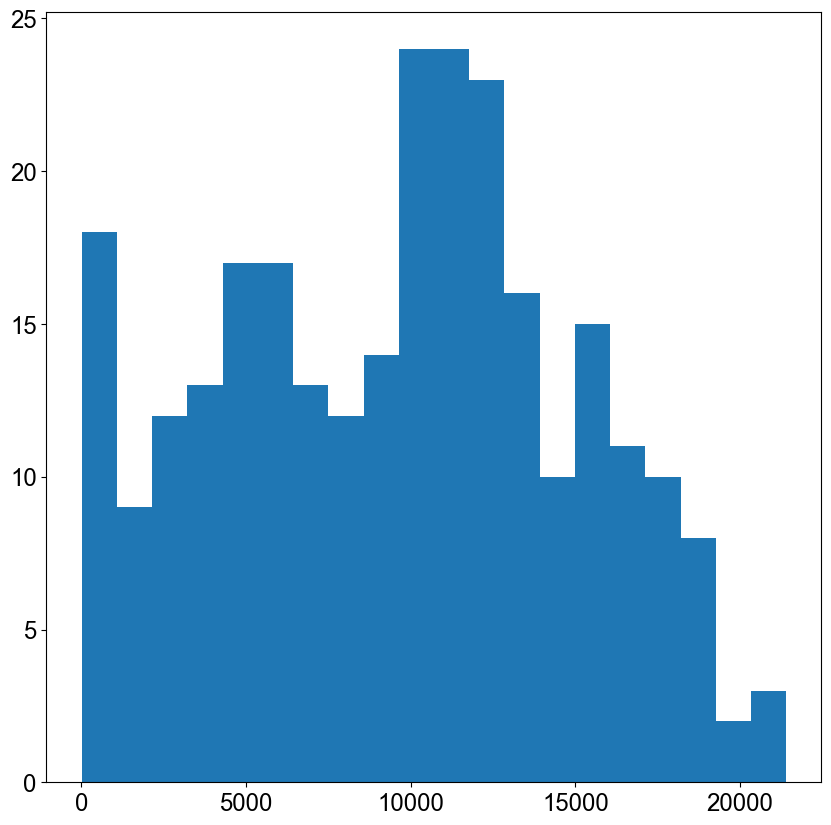

In [203]:
#histogram of AV volumes
plt.hist([sum(j.acv.grid_1d) for j in [i[0] for i in single_residue_info['Al488C5_AVs']]], bins=20)
plt.show()

In [204]:
#make sure that both residues in each pair are still in the single residue "good list"
for i in range(len(pair_residue_info)):
    if not (pair_residue_info['Residue Pair'][i][0] in single_residue_info[single_residue_info['Good List']]['Residue Index'].tolist()):
        pair_residue_info['Good List'][i] = False
        continue
    if not (pair_residue_info['Residue Pair'][i][1] in single_residue_info[single_residue_info['Good List']]['Residue Index'].tolist()):
        pair_residue_info['Good List'][i] = False
print('#Good={0}'.format(sum(single_residue_info['Good List'])))
print('#Good pairs={0}'.format(sum(pair_residue_info['Good List'])))

#Good=256
#Good pairs=15010


In [ ]:
#do fret efficiency or distance metric calculations. Also calculate some additional metrics frettraj doesn't do by default
#only does the calculations as dye1-dye2:res1-res2 for now, but could incorporate directed calculations easily as all AVs calculated already
#can add option to only do attachment atom distances if FRET info not available or looking to do, say, DEER EPR

tempFRETs=[]
tempRmp_vec=[] #vectorial Rmp between AV clouds, calculated as RAV2-RAV1
tempRatt_vec=[] #same, but between attachment atoms

for i in range(len(pair_residue_info)):    
    if pair_residue_info['Good List'][i]==True:
        tempFRETs.append(ft.cloud.FRET.from_volumes(single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[0])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][0]].iloc[0],single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[1])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][1]].iloc[0],list(settings['basic_dye_parameters']['Distance'].keys())[0],labels))    
        tempRmp_vec.append([k.acv.mp-j.acv.mp for j, k in zip(single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[0])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][0]].iloc[0], single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[0])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][1]].iloc[0])])
        tempRatt_vec.append([k.av.attach_xyz-j.av.attach_xyz for j, k in zip(single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[0])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][0]].iloc[0], single_residue_info['{0}_AVs'.format(list(settings['basic_dye_parameters']['Position'].keys())[0])][single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][1]].iloc[0])])
    else:
        tempFRETs.append(None)  
        tempRmp_vec.append(None)  
        tempRatt_vec.append(None)  
pair_residue_info['{0}-{1}_FRET'.format(list(settings['basic_dye_parameters']['Position'].keys())[0],list(settings['basic_dye_parameters']['Position'].keys())[1])]=tempFRETs
pair_residue_info['Rmp_vec']=tempRmp_vec
pair_residue_info['Ratt_vec']=tempRatt_vec
allEs=[]
allRDAs=[]
for i in tempFRETs:
    if i==None:
        allEs.append(None)
        allRDAs.append(None)
    else:
        allEs.append(ft.cloud.Trajectory(i, timestep=1).dataframe['<E_DA>'])
        allRDAs.append(ft.cloud.Trajectory(i, timestep=1).dataframe['<R_DA> (A)'])
pair_residue_info['AllEs']=allEs
pair_residue_info['AllRDAs']=allRDAs
del(tempFRETs)
del(tempRmp_vec)
del(tempRatt_vec)

Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |████████████████████| 100% complete
Progress: |██

In [206]:
#Now, add columns for the Rmp, R_DA, E, etc. and all the individual FRET eff params for distances corresponding to individual  states

dist_types=['mean_R_DA', 'sigma_R_DA', 'mean_E_DA', 'sigma_E_DA', 'mean_R_DA_E', 'sigma_R_DA_E', 'R_attach', 'R_mp']
#sigma is the std of the sampled distances WITHIN A GIVEN STATE FROM THAT STATES AV CLOUD
tempdists={i:[] for i in dist_types}

#these stds are the stds of the means amongst all states (how much the metric changes as conformation changes)
for i in dist_types:
    tempdists['std_'+i]=[]

for i in range(len(pair_residue_info)):
    if pair_residue_info['Good List'][i]==True:
        for j in dist_types:
            temp=[eval('i.{0}'.format(j)) for i in pair_residue_info['{0}-{1}_FRET'.format(list(settings['basic_dye_parameters']['Position'].keys())[0],list(settings['basic_dye_parameters']['Position'].keys())[1])][i]]
            tempdists[j].append(temp)
            tempdists['std_'+j].append(np.std(temp))
    else:
        for j in dist_types:
            tempdists[j].append(None)
            tempdists['std_'+j].append(None)
            
for i in tempdists:
    pair_residue_info[i]=tempdists[i]
del(tempdists)

In [207]:
#define some distance contrast metrics since what we're interested in isn't distances but contrast in dists
#between states

def Dynamic_Shift(E1, E2):
    return 2.**(-.5)*((1.-E1)**.5-(1.-E2)**.5)**2.

def Contrast_Fun(a, b, mode='Dynamic_Shift', scale=1.):
    if mode=='Dynamic_Shift':
        con=Dynamic_Shift(a,b)
    if mode=='Energy_Gaussian':
        con=gaussian(a-b, 0, scale)
    if mode=='Energy_InverseR':
        con=scale*abs(a-b)**-1.
    if mode=='Percent_Diff':
        con=abs(a-b)/(a+b)*2
    return con

In [208]:
#compute representative stats for changes in distance metrics
#will be used for ranking of sites in terms of "fret contrast"

contrast_types=['mean_R_DA', 'mean_E_DA', 'mean_R_DA_E', 'R_attach', 'R_mp']
custom_contrast=['Dynamic_Shift', 'Energy_InverseR', 'Energy_Gaussian'] #must be None, or some combo of 'Dynamic_Shift', 'Energy_InverseR', and 'Energy_Gaussian' in a list

tempcons={'d_'+i:[] for i in contrast_types}
#have to handle the dot product and dynamic shift bits separately
tempcons['d_Rmp_vec']=[]
tempcons['d_Ratt_vec']=[]
#dot product is absolute value as we just want to see ANY change in Rda wrt Rattach
tempcons['dRmpDOTdRatt']=[]
if custom_contrast is not None:
    for j in custom_contrast:
        tempcons[j]=[]

#this is the average of the contrast metric differences between frames
temp_avgdifs={'avg_d_'+i:[] for i in contrast_types}
temp_avgdifs['avg_dRmpDOTdRatt']=[]
if custom_contrast is not None:
    for j in custom_contrast:
        temp_avgdifs['avg_'+j]=[]

for i in range(len(pair_residue_info)):
    if pair_residue_info['Good List'][i]==True:
        for j in contrast_types:
            temp=[abs(l-k) for k, l in combinations(pair_residue_info[j][i], 2)]
            tempcons['d_'+j].append(temp)
            temp_avgdifs['avg_d_'+j].append(np.mean(temp))
        tempcons['d_Rmp_vec'].append([l-k for k, l in combinations(pair_residue_info['Rmp_vec'][i], 2)])
        tempcons['d_Ratt_vec'].append([l-k for k, l in combinations(pair_residue_info['Ratt_vec'][i], 2)])
        tempcons['dRmpDOTdRatt'].append([abs(np.sum(k*l))/(np.sum(k**2.)**.5)/(np.sum(l**2.)**.5) for k, l in zip(tempcons['d_Rmp_vec'][-1],tempcons['d_Ratt_vec'][-1])])
        #tempcons['dRmpDOTdRatt'].append([np.dot(k/(np.sum(k**2.)**.5), (l/np.sum(l**2.)**.5)) for k, l in zip(tempcons['d_Rmp_vec'][-1],tempcons['d_Ratt_vec'][-1])])
        temp_avgdifs['avg_dRmpDOTdRatt'].append(np.mean(tempcons['dRmpDOTdRatt'][-1]))
        if custom_contrast is not None:
            for m in custom_contrast:
                tempcons[m].append([Contrast_Fun(k, l, m, scale=1./len(pair_residue_info['mean_E_DA'][i])) for k, l in combinations(pair_residue_info['mean_E_DA'][i], 2)])
                temp_avgdifs['avg_'+m].append(np.mean(tempcons[m][-1]))    
        
    else:
        for j in contrast_types:
            tempcons['d_'+j].append(None)
            temp_avgdifs['avg_d_'+j].append(None)
        tempcons['d_Rmp_vec'].append(None)
        tempcons['d_Ratt_vec'].append(None)
        tempcons['dRmpDOTdRatt'].append(None)
        temp_avgdifs['avg_dRmpDOTdRatt'].append(None)
        if custom_contrast is not None:
            for m in custom_contrast:
                tempcons[m].append(None)
                temp_avgdifs['avg_'+m].append(None)    

for i in tempcons:
    pair_residue_info[i]=tempcons[i]
for i in temp_avgdifs:
    pair_residue_info[i]=temp_avgdifs[i]
        
del(tempcons)
del(temp_avgdifs)

In [209]:
#introduce a sequence proximity penalty for sites to avoid sites too close together

proximity_penalty_scale=10.
pair_residue_info['Sequence Proximity Penalty']=[gaussian(i[0]-i[1], 0, proximity_penalty_scale, 'peakto1') for i in pair_residue_info['Residue Pair']]

In [210]:
#score function definitions
#just setting up some functions to be used in standardizing and ranking various other parameters

def std_0to1(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))
def std_Zscore(data):
    return (data-np.mean(data))/np.std(data) #(x-u)/s
def square(data):
    return data**2.

def score_parameters(data, weights=None, param_mod=None, standardize_data='0to1', standardize_score='0to1'):
    #takes an input of a pd dataframe, outputs dataframe with same columns plus a summary score column
    #data=input columns, as array of dataframe
    #weights=optional weighting applied to each individual column in being added to the final score. must be same length as number of columns in data or None
    #standardize options for whether to standardize input columns and score column. Supports '0to1' (min=0, max=1), 'Zscore' (value is number of stds away from mean), None (use raw data/output)
    #param_mod should be either None or a list of length equal to the number of columns in data. List entries should be 'square' (square the data), 'abs' (absolute values of the data)
    score=np.zeros(len(data))

    
    
    if standardize_data=='0to1':
        for i in data:
            data[i]=std_0to1(data[i])
    elif standardize_data=='Zscore':
        for i in data:
            data[i]=std_Zscore(data[i])        
    
    if weights is not None:
        weights=pd.DataFrame(np.array(weights)[np.newaxis,:], columns=data.columns)
    else:
        weights=pd.DataFrame(np.ones((1,len(data.columns))),columns=data.columns)
    
    for i in data:
        score=score+weights[i][0]*data[i]
        
    data['Score']=score
    if standardize_score=='0to1':
        data['Score']=std_0to1(data['Score'])
    elif standardize_score=='Zscore':
        data['Score']=std_Zscore(data['Score'])
        
    return data

In [211]:
#Need a cleanup step, as calculations thus far haven't considered favorability of parameters. 
#here, parameters are rephrased in terms of high score=bad
#this is so the whole thing becomes a minimization problem
#example, low solvent accessibility is bad, so multiply by -1, before standardizing. now values near 0 initially are highest

pair_params_to_inverse=['avg_d_mean_R_DA', 'avg_d_mean_E_DA', 'avg_d_mean_R_DA_E', 'avg_d_R_attach', 'avg_d_R_mp', 'avg_dRmpDOTdRatt', 'avg_Dynamic_Shift', 'std_mean_R_DA', 'std_mean_E_DA', 'std_mean_R_DA_E', 'std_R_attach', 'std_R_mp', 'Mean Contacts', 'avg_Energy_InverseR', 'avg_Energy_Gaussian']
single_params_to_inverse=['Mean SASA (nm^2)']
for i in settings['basic_dye_parameters']['Position'].keys():
    single_params_to_inverse.append('avg_'+i+'_grid1dsum')
    
for i in pair_params_to_inverse:
    pair_residue_info[i]=-pair_residue_info[i]
for i in single_params_to_inverse:
    single_residue_info[i]=-single_residue_info[i]

In [212]:
#calculate pair residue scores and individual residue scores
#should probably move to settings, these are effectively weights for the individual parameters that
#have will be standardized, multiplied by the weight, and added together
#also determines which parameters, in the end, are actually used

pair_parameters_to_score=['DCA Direct Info', 'Mean Contacts', 'avg_Dynamic_Shift', 'avg_dRmpDOTdRatt','Sequence Proximity Penalty']
pair_parameter_weights=[1., .2, 1., .3, 0.]
single_parameters_to_score=['Conservation Scores', 'Mean SASA (nm^2)','avg_'+list(settings['basic_dye_parameters']['Position'].keys())[0]+'_grid1dsum']
single_parameter_weights=[.1, .1, .1]
pair_residue_info['Pair_Score']=score_parameters(pair_residue_info[pair_residue_info['Good List']==True][pair_parameters_to_score], weights=pair_parameter_weights, standardize_data='0to1')['Score']
single_residue_info['Single_Score']=score_parameters(single_residue_info[single_residue_info['Good List']==True][single_parameters_to_score], weights=single_parameter_weights, standardize_data='0to1')['Score']


(array([1.000e+00, 1.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 5.000e+00,
        3.000e+00, 7.000e+00, 9.000e+00, 8.000e+00, 1.400e+01, 9.000e+00,
        2.400e+01, 4.100e+01, 6.300e+01, 9.700e+01, 1.330e+02, 2.370e+02,
        3.230e+02, 5.160e+02, 7.150e+02, 1.024e+03, 1.497e+03, 2.311e+03,
        3.110e+03, 2.944e+03, 1.308e+03, 3.980e+02, 1.150e+02, 5.100e+01,
        1.600e+01, 7.000e+00, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

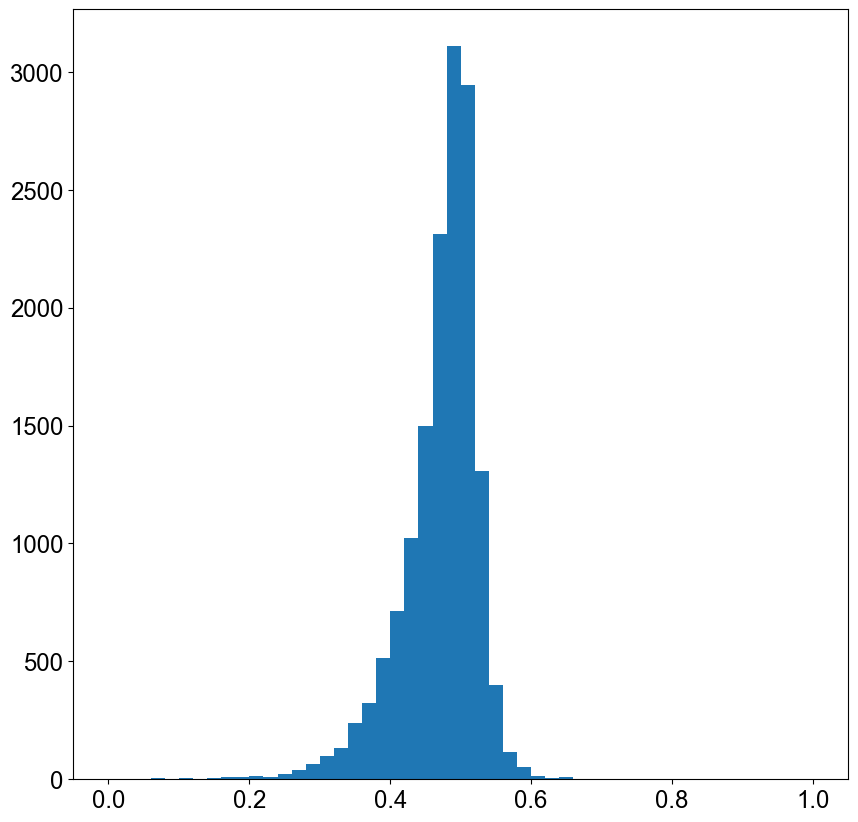

In [213]:
plt.hist(pair_residue_info['Pair_Score'], bins=50)

In [214]:
#calculate total score for each pair
#weights for relative contribution of single residue and pair residue information
pair_vs_single_weights=[1.,.5,.5]
Res1Score=[]
Res2Score=[]
for i in range(len(pair_residue_info)):
    Res1Score.append(single_residue_info[single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][0]]['Single_Score'].iloc[0])
    Res2Score.append(single_residue_info[single_residue_info['Residue Index']==pair_residue_info['Residue Pair'][i][1]]['Single_Score'].iloc[0])

pair_residue_info['Residue 1 Score']=Res1Score
pair_residue_info['Residue 2 Score']=Res2Score
pair_residue_info['Total Score']=score_parameters(pair_residue_info[pair_residue_info['Good List']==True][['Pair_Score', 'Residue 1 Score', 'Residue 2 Score']], weights=pair_vs_single_weights, standardize_score='0to1')['Score']



In [215]:
#an additional function used for selecting pairs. Essentially allows favoring coincidence of one of two residues
#in two different fret pairs (good for logistics of labeling, minimizing distinct perturbations to samples
#with different fret pairs), but disfavoring nearby pairs (otherwise, redundant information from FRET pairs)

def CoProximity_Penalty(Pair1, Pair2, width, coincidence_boon=1., norm='peakto1'):
    penalty=0.
    difs=[i-j for i, j in zip(Pair1, Pair2)]
    if difs==[0 for i in difs]:
        penalty+=np.inf
    for i in difs:
        if i==0:
            penalty-=coincidence_boon*gaussian(0,0,width,norm)
        else:
            penalty+=gaussian(i, 0, width, norm)
    return penalty

In [216]:
#do selection of top X complementary FRET pairs via forward greedy approach. Select best scorer first, then add additional ones until X pairs added
#so top pair is the "seed" and additional ones added greedily
#also some weights (coincidence_boon, comproximity width and penalty fun, dot product, etc) provided
#dot prod used to increase orthogonality between selected pairs
#will instead implement dot product of vectorized contrast metrics (less physical orthogonality, more
#orthogonality in observed FRET values under the relevant structural changes)
ranked_candidates=pair_residue_info[pair_residue_info['Good List']].sort_values('Total Score')

Num_Pairs=10
CoProximity_Penalty_Width=20. #penalty for two sites in complementary pairs being near each other, but non-identical (shared nodes are good, but not neighboring nodes)
#for the following functions, max and min judge based on each pairs worst/best performance respectively, mean and sum based on average performance
CoProximity_Penalty_fun=lambda x: np.max(x)     #can be changed to min, max, mean, sum depending on which value should be used to penalize the complentarity score based Co-Proximity of labeling sites
Coincidence_Boon=.1
dot_prod_penalty_fun=lambda x: np.max(x)     #can be changed to min, max, mean, sum depending on which value should be used to penalize the complentarity score based on alignment of Rmp vectors
dot_prod_among_states=lambda x: np.max(x)     #can be changed to min, max, mean, sum depending on which value should be used as the dot product between pairs amongst the dot products calculated for each state 
CoProximityWeight=1. #weight applied to CoProximity
DotProdWeight=1.


CompscoreMethod=lambda x, y: np.add(x,y) #should be either sum or multiply. Should be sum because otherwise negatives get funky

ScoreMethod=lambda x, y: np.add(x,y) #should be either sum (add score and compscore together, in which case ScoreWeight matters) or multiply (in which case compscore is a modifier to the original score, and weight doesnt matter. negatives fine if Total Score set to 0to1)
ScoreWeight=2. #weight applied to the score


keep_list=[]
keep_list.append(ranked_candidates.iloc[0])
while len(keep_list)<Num_Pairs:
    best=(None, np.inf) #best additional pair based on the criteria tested for complementarity
    for j in range(len(ranked_candidates)):
        #no repeat pairs allowed
        if ranked_candidates['Residue Pair'].iloc[j] in [k['Residue Pair'] for k in keep_list]:
            continue
        compscore=1.
        #applies penalty based on co-incidence of labeling sites in-exactly with ones already in the list
        compscore=CompscoreMethod(compscore, CoProximityWeight*CoProximity_Penalty_fun([CoProximity_Penalty(ranked_candidates['Residue Pair'].iloc[j], k['Residue Pair'], CoProximity_Penalty_Width, coincidence_boon=Coincidence_Boon) for k in keep_list]))
        #normalized dot product calculations of candidate pair against all other pairs, and for all states
        compscore=CompscoreMethod(compscore, DotProdWeight*dot_prod_penalty_fun([dot_prod_among_states([np.sum(m[0]*m[1])*sum(m[0]**2.)**(-.5)*sum(m[1]**2.)**(-.5) for m in l]) for l in [zip(ranked_candidates['Rmp_vec'].iloc[j], k['Rmp_vec']) for k in keep_list]]))
        #incorporate in the pair's score itself, either additively or multiplicatively
        compscore=ScoreMethod(compscore, ScoreWeight*ranked_candidates['Total Score'].iloc[j])
        
        if compscore<best[1]:
            best=(j, compscore)
            
    keep_list.append(ranked_candidates.iloc[best[0]])
    
Final_Network=pd.concat(keep_list, axis=1).T

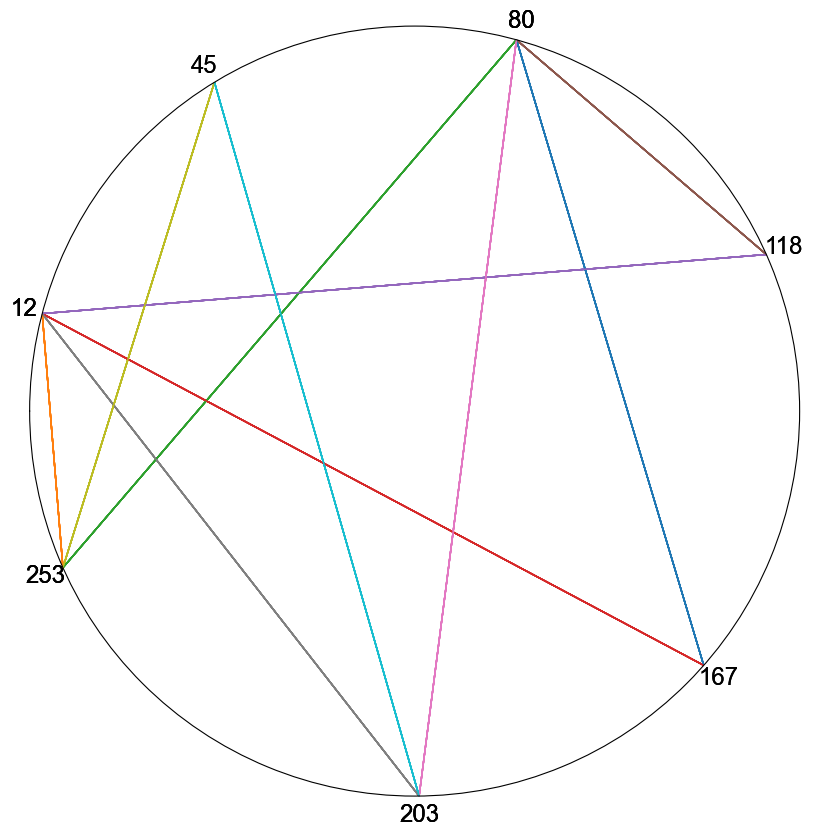

In [217]:
#plot the selected FRET pairs on a radial plot

ax=plt.subplot(111,projection='polar')
firstres=single_residue_info['Residue Index'].iloc[0]
lastres=single_residue_info['Residue Index'].iloc[-1]
pairlist=np.array([[i[0],i[1]] for i in Final_Network['Residue Pair']]).astype(float).T
for i in Final_Network['Residue Pair']:
    ax.plot((pairlist-firstres)/(lastres-firstres)*2*np.pi,[1,1])
ax.set_rmax(1)
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)
ax.set_rticks([])
plt.grid(visible=None)
plt.thetagrids((pairlist.flatten()-firstres)/(lastres-firstres)*360, labels=pairlist.flatten().astype(int))
plt.savefig('Network.png')

plt.show()

In [218]:
#save the top FRET pairs that were selected
To_Save_List=Final_Network[['Residue Pair', 'DCA Direct Info', 'avg_Dynamic_Shift', 'Pair_Score', 'Residue 1 Score', 'Residue 2 Score', 'Total Score','AllEs','AllRDAs']]
To_Save_List.to_csv('Pair_List.csv', index=False)

Text(0.5, 0, 'Index')

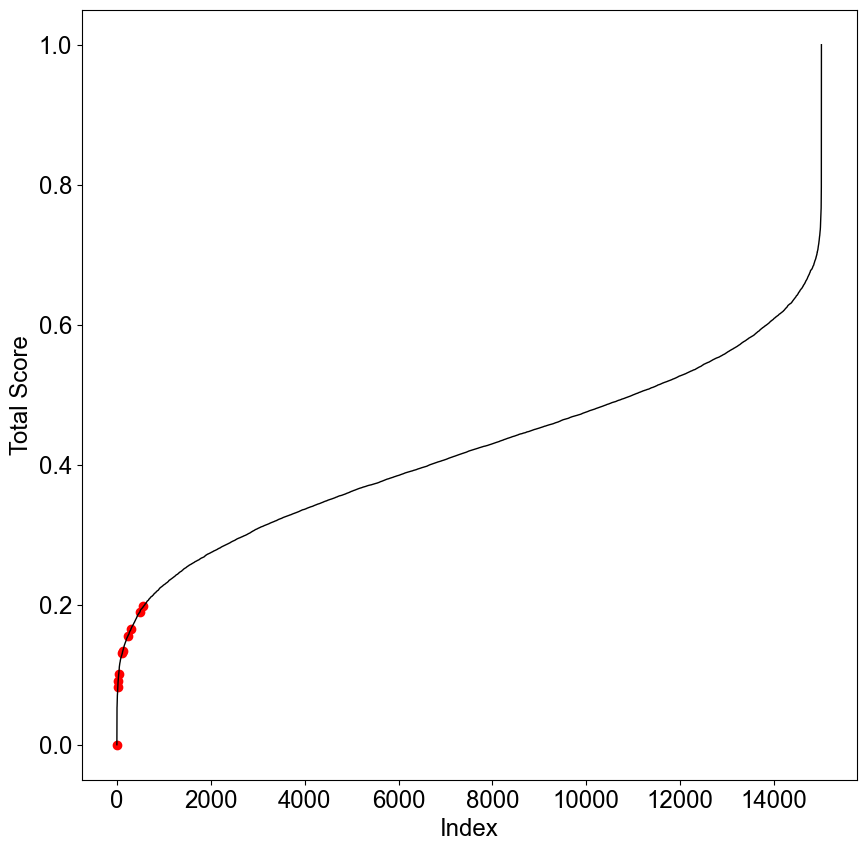

In [219]:
#plot the scores of selected pairs. Should see them appear near the min, but distribution will change sample-to-sample

plt.plot(np.arange(len(pair_residue_info['Total Score'][pair_residue_info['Total Score'].notna()])),pair_residue_info['Total Score'][pair_residue_info['Total Score'].notna()].sort_values(), color='black', linewidth=1)

indices=[]
for i in Final_Network['Residue Pair']:
    indices.append((pair_residue_info[pair_residue_info['Total Score'].notna()].sort_values('Total Score')['Residue Pair']).tolist().index(i))
plt.scatter(indices, Final_Network['Total Score'], color='red')


plt.ylabel('Total Score')
plt.xlabel('Index')

In [220]:
Final_Network

,Residue Pair,Good List,DCA Mutual Info,DCA Direct Info,Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_closed_fromSBM+DCA.pdb (nm),Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_open_fromSBM+DCA.pdb (nm),Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_Twisted_allatom.pdb (nm),Contacts,Mean Contacts,Al488C5-Al647C2_FRET,...,avg_d_R_mp,avg_dRmpDOTdRatt,avg_Dynamic_Shift,avg_Energy_InverseR,avg_Energy_Gaussian,Sequence Proximity Penalty,Pair_Score,Residue 1 Score,Residue 2 Score,Total Score
18335,"(80, 167)",True,0.078082,0.008,3.618985,3.342546,2.772807,"[3.618985414505005, 3.342545509338379, 2.77280...",-3.244779,[<fretraj.cloud.FRET object at 0x7fab88509850>...,...,-10.936102,-0.994357,-0.031835,-3.827461,-0.938635,0.0,0.304486,0.086539,0.137885,0.0
3155,"(12, 253)",True,0.085711,0.005065,0.776147,0.835658,0.806825,"[0.7761465907096863, 0.8356581926345825, 0.806...",-0.80621,[<fretraj.cloud.FRET object at 0x7fadc31f62b0>...,...,-1.365026,-0.996538,-0.00053,-11.257337,-1.19029,0.0,0.519467,0.237696,0.116422,0.197492
18421,"(80, 253)",True,0.041209,0.004277,1.79183,1.951778,1.81555,"[1.7918301820755005, 1.951777696609497, 1.8155...",-1.853053,[<fretraj.cloud.FRET object at 0x7fab88546460>...,...,-0.739171,-0.999593,-0.000194,-116.116624,-1.196104,0.0,0.501708,0.086539,0.116422,0.130642
3069,"(12, 167)",True,0.182371,0.009509,3.815336,4.123183,3.182514,"[3.815335988998413, 4.123182773590088, 3.18251...",-3.707011,[<fretraj.cloud.FRET object at 0x7fae2b09d610>...,...,-11.876694,-0.960217,-0.021106,-4.050461,-1.145728,0.0,0.370047,0.237696,0.137885,0.100346
3020,"(12, 118)",True,0.092225,0.007251,3.368624,3.745947,3.095688,"[3.368624210357666, 3.7459471225738525, 3.0956...",-3.40342,[<fretraj.cloud.FRET object at 0x7faccdd2ba90>...,...,-3.958371,-0.975087,-0.003936,-6.005126,-1.153637,0.0,0.466769,0.237696,0.100219,0.154858
18286,"(80, 118)",True,0.04801,0.004342,1.110691,1.084631,1.142373,"[1.1106905937194824, 1.0846314430236816, 1.142...",-1.112565,[<fretraj.cloud.FRET object at 0x7facb59fdcd0>...,...,-1.324722,-0.996138,-0.000051,-27.027747,-1.19569,0.000732,0.515486,0.086539,0.100219,0.134591
18371,"(80, 203)",True,0.079787,0.005285,1.098554,1.136538,1.228021,"[1.0985535383224487, 1.136538028717041, 1.2280...",-1.154371,[<fretraj.cloud.FRET object at 0x7fab8851da90>...,...,-10.529257,-0.998883,-0.013181,-5.014025,-0.975217,0.0,0.439932,0.086539,0.125382,0.090509
3105,"(12, 203)",True,0.181422,0.006953,0.860946,0.753637,0.709834,"[0.8609459400177002, 0.7536367774009705, 0.709...",-0.774806,[<fretraj.cloud.FRET object at 0x7fae2b0b2820>...,...,-5.874599,-0.995988,-0.010043,-7.318123,-1.146885,0.0,0.469291,0.237696,0.125382,0.165487
11141,"(45, 253)",True,0.063908,0.007414,2.752014,2.697419,2.344526,"[2.75201416015625, 2.6974191665649414, 2.34452...",-2.597986,[<fretraj.cloud.FRET object at 0x7facb59d5580>...,...,-0.500693,-0.999633,-0.000058,-151.693307,-1.196163,0.0,0.498312,0.256961,0.116422,0.189602
11091,"(45, 203)",True,0.093266,0.006631,2.677876,2.667529,2.76986,"[2.6778762340545654, 2.6675291061401367, 2.769...",-2.705088,[<fretraj.cloud.FRET object at 0x7facb59abbb0>...,...,-11.189697,-0.997052,-0.026292,-1.796492,-0.975072,0.0,0.341708,0.256961,0.125382,0.083019


In [221]:
pair_residue_info

,Residue Pair,Good List,DCA Mutual Info,DCA Direct Info,Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_closed_fromSBM+DCA.pdb (nm),Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_open_fromSBM+DCA.pdb (nm),Contacts /Users/aishkrishnamohan/FRETNet-Designer/Test/RBP_Twisted_allatom.pdb (nm),Contacts,Mean Contacts,Al488C5-Al647C2_FRET,...,avg_d_R_mp,avg_dRmpDOTdRatt,avg_Dynamic_Shift,avg_Energy_InverseR,avg_Energy_Gaussian,Sequence Proximity Penalty,Pair_Score,Residue 1 Score,Residue 2 Score,Total Score
0,"(1, 2)",False,0.000000,0.053536,3.740076,4.434337,3.347819,"[3.7400760650634766, 4.434337139129639, 3.3478...",-3.840744,None,...,NaN,NaN,NaN,NaN,NaN,0.995012,NaN,0.280443,0.649865,NaN
1,"(1, 3)",False,0.000000,0.028687,6.172748,6.172748,6.172748,"[6.17274808883667, 6.17274808883667, 6.1727480...",-6.172748,None,...,NaN,NaN,NaN,NaN,NaN,0.980199,NaN,0.280443,0.829620,NaN
2,"(1, 4)",False,0.000000,0.013261,6.172748,6.172748,6.172748,"[6.17274808883667, 6.17274808883667, 6.1727480...",-6.172748,None,...,NaN,NaN,NaN,NaN,NaN,0.955997,NaN,0.280443,0.973442,NaN
3,"(1, 5)",False,0.000000,0.005106,3.917968,4.650023,3.540791,"[3.9179680347442627, 4.650022983551025, 3.5407...",-4.036261,None,...,NaN,NaN,NaN,NaN,NaN,0.923116,NaN,0.280443,0.968396,NaN
4,"(1, 6)",False,0.000000,0.003006,3.816537,4.365122,3.534618,"[3.8165371417999268, 4.365121841430664, 3.5346...",-3.905426,None,...,NaN,NaN,NaN,NaN,NaN,0.882497,NaN,0.280443,0.952917,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36580,"(268, 270)",False,0.011128,0.056440,3.231394,3.882882,2.997405,"[3.231394052505493, 3.8828818798065186, 2.9974...",-3.370560,None,...,NaN,NaN,NaN,NaN,NaN,0.980199,NaN,0.892694,0.554530,NaN
36581,"(268, 271)",False,0.002085,0.032441,3.432003,4.116376,3.033539,"[3.4320027828216553, 4.116375923156738, 3.0335...",-3.527306,None,...,NaN,NaN,NaN,NaN,NaN,0.955997,NaN,0.892694,0.410789,NaN
36582,"(269, 270)",False,0.012332,0.083140,6.172748,6.172748,6.172748,"[6.17274808883667, 6.17274808883667, 6.1727480...",-6.172748,None,...,NaN,NaN,NaN,NaN,NaN,0.995012,NaN,0.771496,0.554530,NaN
36583,"(269, 271)",False,0.002435,0.045029,6.172748,6.172748,6.172748,"[6.17274808883667, 6.17274808883667, 6.1727480...",-6.172748,None,...,NaN,NaN,NaN,NaN,NaN,0.980199,NaN,0.771496,0.410789,NaN


In [222]:
pair_residue_info.to_csv('all_pair_info.csv')
single_residue_info.to_csv('all_single_info.csv')